In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akashshingha850/mrl-eye-dataset")

print("Path to dataset files:", path)


100%|██████████| 329M/329M [00:09<00:00, 34.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4


In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [4]:
import os

print("Main dataset path:", path)
for root, dirs, files in os.walk(path):
    print(root)
    if len(files) > 0:
        print("Files sample:", files[:5])
    break  # just to avoid huge output


Main dataset path: /root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4
/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4


In [5]:
!ls "/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4"


data


In [6]:
!find "/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4" -type d | head -20


/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4
/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4/data
/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4/data/val
/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4/data/val/awake
/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4/data/val/sleepy
/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4/data/test
/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4/data/test/awake
/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4/data/test/sleepy
/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4/data/train
/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4/data/train/awake
/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4/data/train/sleepy


In [7]:
base_dir = "/root/.cache/kagglehub/datasets/akashshingha850/mrl-eye-dataset/versions/4/data"

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")


In [27]:
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 50937 images belonging to 2 classes.
Found 16980 images belonging to 2 classes.
Found 16981 images belonging to 2 classes.


In [29]:
# See how classes were labeled during training
print(train_gen.class_indices)


{'awake': 0, 'sleepy': 1}


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,882 (2.60 MB)

 Trainable params: 682,882 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1592/1592 ━━━━━━━━━━━━━━━━━━━━ 73s 42ms/step - accuracy: 0.8408 - loss: 0.3482 - val_accuracy: 0.9717 - val_loss: 0.0777
Epoch 2/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.9567 - loss: 0.1209 - val_accuracy: 0.9779 - val_loss: 0.0610
Epoch 3/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.9663 - loss: 0.0953 - val_accuracy: 0.9793 - val_loss: 0.0562
Epoch 4/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.9728 - loss: 0.0791 - val_accuracy: 0.9811 - val_loss: 0.0543
Epoch 5/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.9749 - loss: 0.0714 - val_accuracy: 0.9835 - val_loss: 0.0460
Epoch 6/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - accuracy: 0.9769 - loss: 0.0672 - val_accuracy: 0.9833 - val_loss: 0.0468
Epoch 7/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - accuracy: 0.9783 - loss: 0.0613 - val_accuracy: 0.9845 - val_loss: 0.0423
Epoch 8/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.9802 - loss: 0.05

In [12]:
loss, acc = model.evaluate(test_gen)
print(f"Test Accuracy: {acc*100:.2f}%")

531/531 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9926 - loss: 0.0218
Test Accuracy: 98.49%


In [13]:
model.save("driver_drowsiness_cnn.h5")
print("Model saved as driver_drowsiness_cnn.h5")


Model saved as driver_drowsiness_cnn.h5


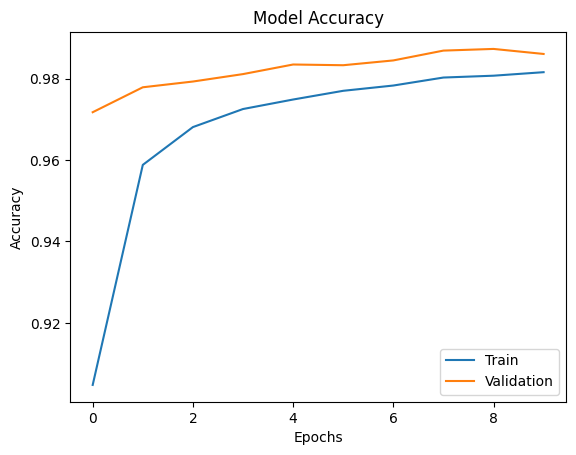

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [15]:
from tensorflow.keras.models import load_model

model = load_model("driver_drowsiness_cnn.h5")
print("Model loaded successfully.")


Model loaded successfully.


In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load image in grayscale and resize to 64x64 (as used during training)
img = image.load_img("open.png", target_size=(64, 64), color_mode='grayscale')

# Convert to array and scale
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Make prediction
prediction = model.predict(img_array)
print("Prediction:", prediction)

# If softmax output (2 classes), interpret result
if prediction[0][0] < prediction[0][1]:
    print("Predicted: Closed Eyes (Drowsy)")
else:
    print("Predicted: Open Eyes (Alert)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: [[9.999453e-01 5.470465e-05]]
Predicted: Open Eyes (Alert)


In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_eye_state(img_name):
    # Load and preprocess image
    img = image.load_img(img_name, target_size=(64, 64), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Predict
    prediction = model.predict(img_array)
    print("Prediction probabilities:", prediction)

    # Interpret
    if prediction[0][0] < prediction[0][1]:
        label = "Closed Eyes (Drowsy)"
    else:
        label = "Open Eyes (Alert)"

    # Show image with prediction
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {label}")
    plt.axis('off')
    plt.show()

    return label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction probabilities: [[9.999453e-01 5.470465e-05]]


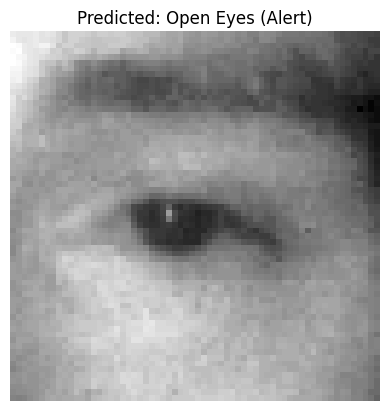

'Open Eyes (Alert)'

In [32]:
predict_eye_state("open.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction probabilities: [[1.1057847e-05 9.9998891e-01]]


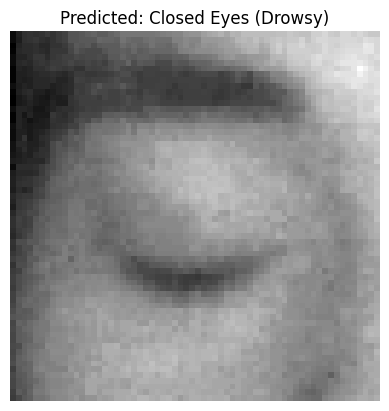

'Closed Eyes (Drowsy)'

In [33]:
predict_eye_state("close.png")